                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   34
Model:                            GLM   Df Residuals:                       32
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -203.51
Date:                Sat, 18 Jan 2025   Deviance:                       309.15
Time:                        12:17:52   Pearson chi2:                     300.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7811      0.072     24.713      0.0

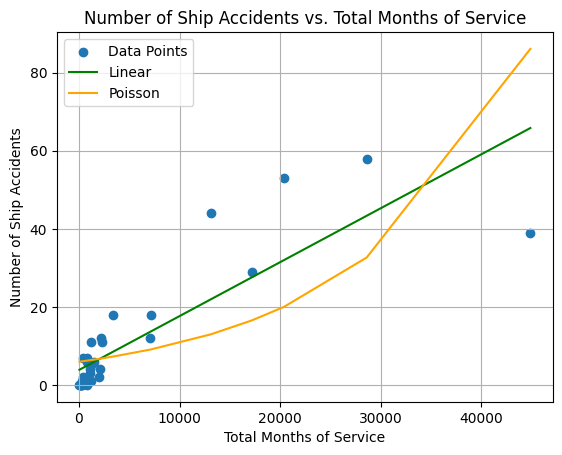

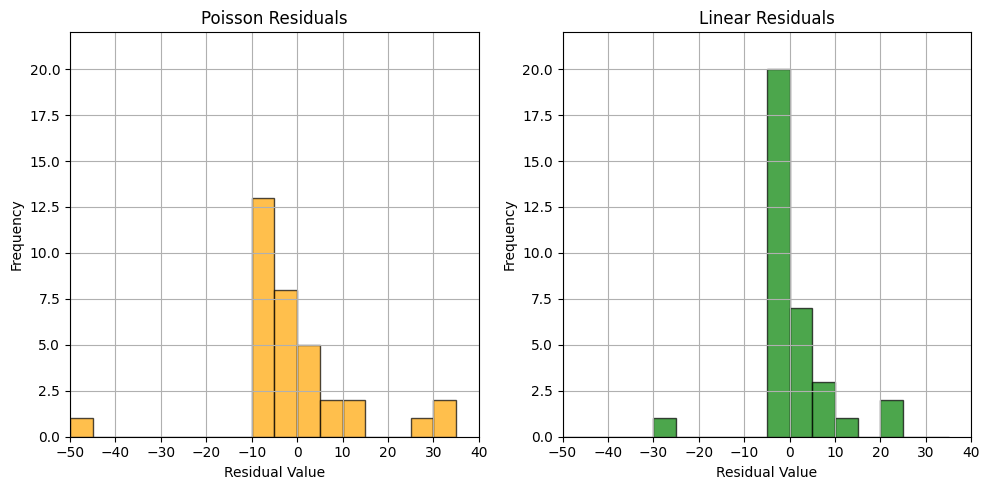

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def plot_residuals(residuals_poisson, residuals_linear):
    plt.figure(figsize=(10, 5))

    # Define bins for both histograms
    # 18 bins from -50 to 40
    bins = np.linspace(-50, 40, 18, endpoint=False)

    # Poisson Residuals
    plt.subplot(1, 2, 1)
    plt.hist(residuals_poisson, bins=bins, color="orange", edgecolor="black", alpha=0.7)
    plt.title("Poisson Residuals")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.xlim(-50, 40)
    plt.ylim(0, 22)
    plt.grid()

    # Linear Residuals
    plt.subplot(1, 2, 2)
    plt.hist(residuals_linear, bins=bins, color="green", edgecolor="black", alpha=0.7)
    plt.title("Linear Residuals")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.xlim(-50, 40)
    plt.ylim(0, 22)
    plt.grid()

    plt.tight_layout()
    plt.show()

def load_data():
    url = "https://raw.githubusercontent.com/jh85/glm/refs/heads/main/ship_accident.txt"
    df = pd.read_csv(url, sep=r"\s+")

    # Filter out rows with non-numeric values (e.g., dots) in the Months column
    # Convert the Months and Acc columns to float for further analysis
    df = df[pd.to_numeric(df["Months"], errors="coerce").notnull()]
    df["Months"] = df["Months"].astype(float)
    df["Acc"] = df["Acc"].astype(float)
    return df

def main():
    df = load_data()
    x = df.Months.to_numpy()
    y = df.Acc.to_numpy()

    # Poisson Regression
    glm_x = sm.add_constant(x)
    poisson_model = sm.GLM(y, glm_x, family=sm.families.Poisson())
    poisson_results = poisson_model.fit()
    # Sort x to ensure smooth and ordered plotting of regression lines
    x_sorted = np.sort(x)
    x_sorted_glm = sm.add_constant(x_sorted)
    y_poisson = poisson_model.predict(poisson_results.params, exog=x_sorted_glm)

    # Linear Regression
    glm_x = sm.add_constant(x)
    linear_model = sm.GLM(y, glm_x, family=sm.families.Gaussian())
    linear_results = linear_model.fit()
    x_sorted = np.sort(x)
    x_sorted_glm = sm.add_constant(x_sorted)
    y_linear = linear_model.predict(linear_results.params, exog=x_sorted_glm)

    # Alternative: Linear regression using sklearn's LinearRegression
    # linear_model = LinearRegression()
    # linear_model.fit(x.reshape(-1,1),y)
    # y_linear  = linear_model.predict(x_sorted.reshape(-1,1))
    # y_pred_linear = linear_model.predict(x.reshape(-1,1))

    # Compare the Mean Squared Error (MSE) of Poisson and Linear models to evaluate performance
    y_pred_poisson = poisson_model.predict(poisson_results.params, exog=glm_x)
    y_pred_linear = linear_model.predict(linear_results.params, exog=glm_x)
    mse_poisson = mean_squared_error(y, y_pred_poisson)
    mse_linear = mean_squared_error(y, y_pred_linear)
    
    print(poisson_results.summary())
    print(linear_results.summary())
    print(f"MSE Poisson: {round(mse_poisson)} Linear: {round(mse_linear)}")

    plt.scatter(x, y, label="Data Points")
    plt.plot(x_sorted, y_linear, color="green", label="Linear")
    plt.plot(x_sorted, y_poisson, color="orange", label="Poisson")
    plt.ylabel("Number of Ship Accidents")
    plt.xlabel("Total Months of Service")
    plt.grid()
    plt.legend()
    plt.title("Number of Ship Accidents vs. Total Months of Service")
    plt.show()

    # Analyze the residuals from each model to understand differences in fit
    residuals_poisson = y - y_pred_poisson
    residuals_linear = y - y_pred_linear
    plot_residuals(residuals_poisson, residuals_linear)

main()